In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [2]:
# Load the dataset
df = pd.read_csv("CAR DETAILS.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(3577, 8)

In [5]:
name = df["name"].str.split(" ", expand = True)
df["car_maker"] = name[0]
df["car_model"] = name[1]

In [6]:
# Calculate car age
df["car_age"] = 2023 - df["year"]
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [7]:
df.drop(["name"], axis=1, inplace=True)

In [8]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [9]:
# Encoding data with get dummies
df = pd.get_dummies(df, drop_first=True, columns=df.columns.difference(['selling_price', 'km_driven', 'year','car_age']))
df.head()

,year,selling_price,km_driven,car_age,car_maker_Audi,car_maker_BMW,car_maker_Chevrolet,car_maker_Daewoo,car_maker_Datsun,car_maker_Fiat,...,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2007,60000,70000,16,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1,2007,135000,50000,16,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
2,2012,600000,100000,11,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2017,250000,46000,6,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,True
4,2014,450000,141000,9,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True


In [10]:
# Encode categorical columns
encoder = LabelEncoder()
df1 = df.apply(encoder.fit_transform)
df1.head()

,year,selling_price,km_driven,car_age,car_maker_Audi,car_maker_BMW,car_maker_Chevrolet,car_maker_Daewoo,car_maker_Datsun,car_maker_Fiat,...,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,13,17,474,13,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,13,60,335,13,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,18,236,607,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,23,114,309,3,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,20,193,681,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [11]:
# Split data into features and target
X = df1.drop("selling_price", axis=1)
y = df1["selling_price"]

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [14]:
df1.columns

Index(['year', 'selling_price', 'km_driven', 'car_age', 'car_maker_Audi',
       'car_maker_BMW', 'car_maker_Chevrolet', 'car_maker_Daewoo',
       'car_maker_Datsun', 'car_maker_Fiat',
       ...
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual'],
      dtype='object', length=227)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"Evaluating {name}:")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("MAE:", mae)
        print("MSE:", mse)
        print("R2 Score:", r2)
        print("Training Score: ", model.score(X_train, y_train))
        print("Testing Score: ", model.score(X_test, y_test))
        print()
        
# Call the function to evaluate models        
evaluate_models(models, X_train, y_train, X_test, y_test)

Evaluating Linear Regression:
MAE: 257944032.4231508
MSE: 9.009106538158205e+18
R2 Score: -883447848407726.6
Training Score:  0.8989693945637564
Testing Score:  -883447848407726.6

Evaluating Ridge Regression:
MAE: 27.87113858960886
MSE: 1384.5049496907425
R2 Score: 0.8642331607764303
Training Score:  0.8951364310380663
Testing Score:  0.8642331607764303

Evaluating Lasso Regression:
MAE: 44.98835628983222
MSE: 3337.6174959621794
R2 Score: 0.6727077226662945
Training Score:  0.7060798511236004
Testing Score:  0.6727077226662945

Evaluating KNeighbors Regressor:
MAE: 52.837430167597766
MSE: 5130.409497206703
R2 Score: 0.4969035816636669
Training Score:  0.6628422470026722
Testing Score:  0.4969035816636669

Evaluating Random Forest Regressor:
MAE: 30.435746907422182
MSE: 1807.069546075519
R2 Score: 0.8227957793992389
Training Score:  0.9768548263797862
Testing Score:  0.8227957793992389



In [18]:
###  using hyper-perameter tuingng Random Forest Regressionrandom_state = 7, max_depth=10
rf= RandomForestRegressor(max_depth=15, random_state = 7)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=7)

In [23]:
def scores(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)
  print("MAE: ", mae)
  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("R2 Score: ", r2)

def model_score(model):
  print("Training Score: ", model.score(X_train, y_train))
  print("Testing Score: ", model.score(X_test, y_test))


In [28]:
model_score(rf)

y_pred= rf.predict(X_test)

scores(y_test,y_pred)

Training Score:  0.9408005248655533
Testing Score:  0.8119663228460984
MAE:  31.75051321264413
MSE:  1917.5047325026983
RMSE:  43.78932212883294
R2 Score:  0.8119663228460984


In [30]:
### Saving the best model using Pickle
with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [31]:
df_sample = df1.sample(n=20, random_state = 15)
df_sample.head()


,year,selling_price,km_driven,car_age,car_maker_Audi,car_maker_BMW,car_maker_Chevrolet,car_maker_Daewoo,car_maker_Datsun,car_maker_Fiat,...,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
249,24,208,212,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1869,22,161,196,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3319,22,264,706,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3964,20,222,392,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1258,23,99,257,3,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1


In [32]:
# Saving the Sample Dataset
df_sample.to_csv("sample-dataset.csv")

In [33]:
#### Loading the best model using Pickle

# Load the saved trained ML model
with open('rfmodel.pkl', 'rb') as file:
    best_model = pickle.load(file)
best_model

RandomForestRegressor(max_depth=15, random_state=7)

In [34]:
### Selecting 20 Dependent and Independent Variable randomly from dataset

x_sample = df_sample.drop("selling_price", axis = 1)
y_sample = df_sample["selling_price"]
print(x_sample.shape)
print(y_sample.shape)

(20, 226)
(20,)


In [35]:
#### Generate the Predictions for randomly 20 points selected from dataset
ypred_sample = best_model.predict(x_sample)
ypred_sample

array([223.88237282, 180.52397544, 238.62334426, 205.59793666,
       112.024457  ,  37.72636439,  42.21220426,  63.96691797,
        27.02097743, 110.98188303, 207.45630366, 156.97166667,
       129.76128916,  20.70349898, 128.33685593, 139.63999398,
       269.79582308,  61.23225089, 147.15327466, 142.91088309])

In [37]:
model_score(best_model)

scores(y_sample,ypred_sample)

Training Score:  0.9408005248655533
Testing Score:  0.8119663228460984
MAE:  15.951993944505073
MSE:  481.55264259460193
RMSE:  21.944307749268418
R2 Score:  0.9255858385018966


In [38]:
# Perform cross-validation for the RandomForestRegressor
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("Cross-Validation MSE Scores:", cv_mse_scores)
print("Mean MSE:", cv_mse_scores.mean())

Cross-Validation MSE Scores: [1706.42761529 1470.74445891 1488.64718187 1623.82295812 2046.99495076]
Mean MSE: 1667.3274329917945


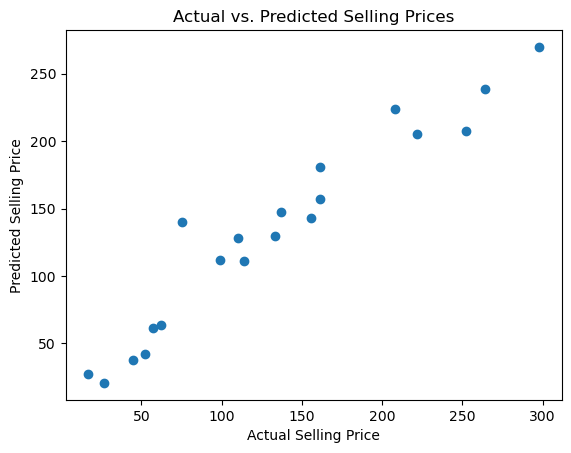

In [41]:
# Visualize predicted vs. actual selling prices
plt.scatter(y_sample, ypred_sample)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()